In [1]:
import pandas as pd
import gmaps as gp
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:97% !important; }</style>"))

In [2]:
properati = pd.read_csv('datos/properati_2.csv')
len(properati)

121220

In [3]:
properati.dtypes

Unnamed: 0                      int64
id                             object
created_on                     object
operation                      object
property_type                  object
place_name                     object
place_with_parent_names        object
country_name                   object
state_name                     object
geonames_id                   float64
lat-lon                        object
lat                           float64
lon                           float64
price                         float64
currency                       object
price_aprox_local_currency    float64
price_aprox_usd               float64
surface_total_in_m2           float64
surface_covered_in_m2         float64
price_usd_per_m2              float64
price_per_m2                  float64
floor                         float64
rooms                         float64
expenses                      float64
properati_url                  object
description                    object
title       

In [4]:
properati.columns

Index([u'Unnamed: 0', u'id', u'created_on', u'operation', u'property_type',
       u'place_name', u'place_with_parent_names', u'country_name',
       u'state_name', u'geonames_id', u'lat-lon', u'lat', u'lon', u'price',
       u'currency', u'price_aprox_local_currency', u'price_aprox_usd',
       u'surface_total_in_m2', u'surface_covered_in_m2', u'price_usd_per_m2',
       u'price_per_m2', u'floor', u'rooms', u'expenses', u'properati_url',
       u'description', u'title', u'image_thumbnail', u'region', u'localidad',
       u'ciudad', u'barrio'],
      dtype='object')

In [5]:
properati['created_on'] = pd.to_datetime(properati['created_on'])

In [6]:
#Saco algunas columnas que no parecen servir
properati_filtrado = properati.drop( ['id','operation','title','description','image_thumbnail','properati_url',
                            'country_name','state_name','place_name','lat-lon','geonames_id'], 1)
# los geonames hacen referencia a place_name y no a la propiedad
properati_filtrado.dropna(how='all',inplace=True)
properati_filtrado.drop('place_with_parent_names',1,inplace=True)
properati_filtrado.head(10)

,Unnamed: 0,created_on,property_type,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,region,localidad,ciudad,barrio
0,0,2017-02-01,PH,-34.661824,-58.508839,62000.0,USD,1093959.00,62000.00,55.0,40.0,1127.272727,1550.000000,NaN,NaN,NaN,Capital Federal,Mataderos,NaN,NaN
1,1,2017-02-01,apartment,-34.903883,-57.964330,150000.0,USD,2646675.00,150000.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bs.As. G.B.A. Zona Sur,La Plata,NaN,NaN
2,2,2017-02-01,apartment,-34.652262,-58.522982,72000.0,USD,1270404.00,72000.00,55.0,55.0,1309.090909,1309.090909,NaN,NaN,NaN,Capital Federal,Mataderos,NaN,NaN
3,3,2017-02-01,PH,-34.647797,-58.516424,95000.0,USD,1676227.50,95000.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Capital Federal,Liniers,NaN,NaN
4,4,2017-02-01,apartment,-38.002626,-57.549447,64000.0,USD,1129248.00,64000.00,35.0,35.0,1828.571429,1828.571429,NaN,NaN,NaN,Buenos Aires Costa Atlántica,Mar del Plata,Centro,NaN
5,5,2017-02-01,house,-33.014071,-58.519828,NaN,NaN,NaN,NaN,53.0,NaN,NaN,NaN,NaN,NaN,NaN,Entre Ríos,Gualeguaychú,NaN,NaN
6,6,2017-02-01,PH,-34.532957,-58.521782,130000.0,USD,2293785.00,130000.00,106.0,78.0,1226.415094,1666.666667,NaN,NaN,NaN,Bs.As. G.B.A. Zona Norte,Vicente López,Munro,NaN
7,7,2017-02-01,apartment,-34.559873,-58.443362,138000.0,USD,2434941.00,138000.00,45.0,40.0,3066.666667,3450.000000,NaN,NaN,NaN,Capital Federal,Belgrano,NaN,NaN
8,8,2017-02-01,apartment,-34.559873,-58.443362,195000.0,USD,3440677.50,195000.00,65.0,60.0,3000.000000,3250.000000,NaN,NaN,NaN,Capital Federal,Belgrano,NaN,NaN
9,9,2017-02-01,house,-32.942031,-60.725919,460000.0,ARS,455201.45,25798.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Santa Fe,Rosario,NaN,NaN


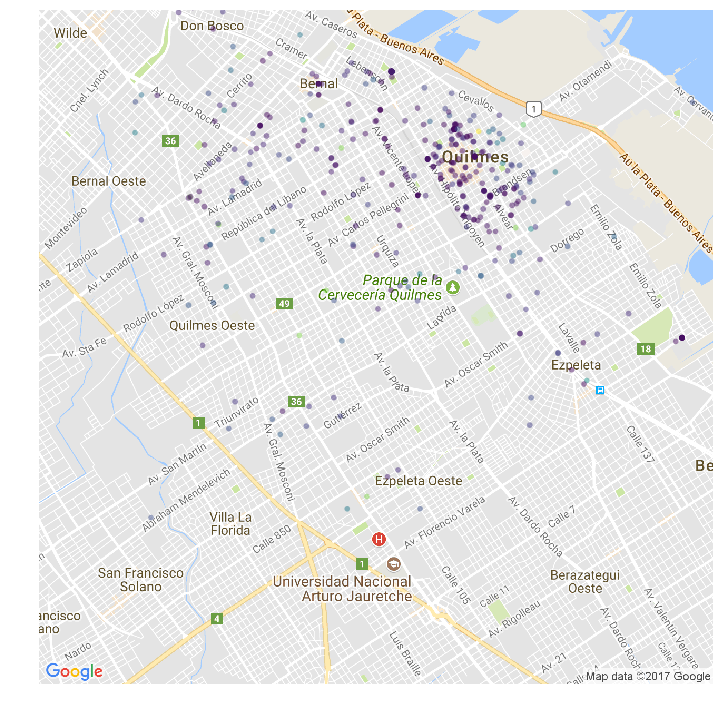

In [7]:
#solo para probar si funcionaba
cap=properati_filtrado.loc[(properati_filtrado['localidad'] == 'Quilmes')] 
gp.scatter(cap['lat'], cap['lon'],cap['surface_total_in_m2'])

In [8]:
properati_filtrado = properati_filtrado.dropna(subset=['price'])  

In [9]:
ranking_precios_usd = properati_filtrado.groupby('region').mean()['price_usd_per_m2'].sort_values(ascending=False)

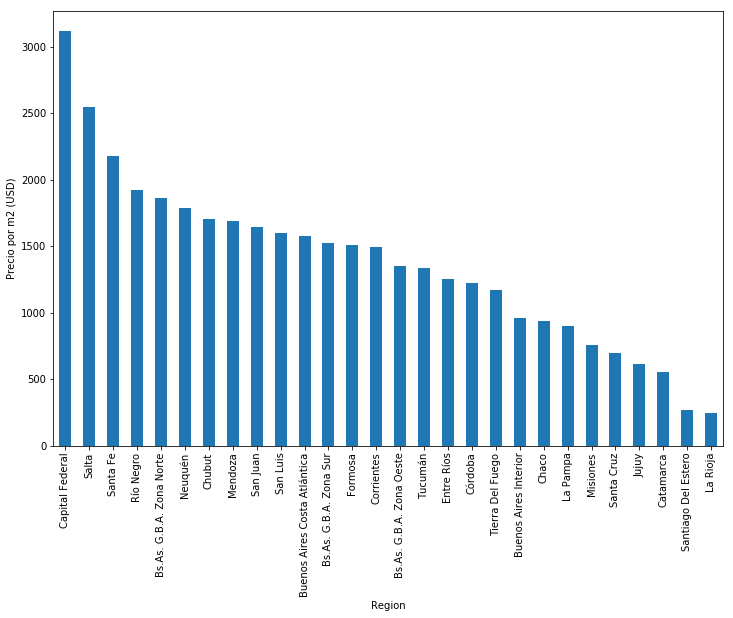

In [10]:
ranking_precios_usd.plot(kind='bar',figsize=(12,8))
plt.xlabel('Region')
plt.ylabel('Precio por m2 (USD)')
plt.show()

#### salta en segundo lugar. Investigo por que

In [11]:
salta = properati_filtrado.loc[properati_filtrado['region'] == 'Salta'].sort_values('price_usd_per_m2',ascending = False)
salta

,Unnamed: 0,created_on,property_type,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,region,localidad,ciudad,barrio
25343,25343,2017-04-28,apartment,-24.791039,-65.411225,2850000.0,USD,50286825.00,2850000.00,120.0,120.0,23750.000000,23750.000000,NaN,4.0,NaN,Salta,Salta,NaN,NaN
26737,26737,2017-04-28,house,-24.782439,-65.445556,2800000.0,USD,49404600.00,2800000.00,150.0,160.0,18666.666667,17500.000000,NaN,5.0,NaN,Salta,Salta,NaN,NaN
25561,25561,2017-04-28,apartment,-24.834989,-65.429807,1100000.0,USD,19408950.00,1100000.00,65.0,65.0,16923.076923,16923.076923,NaN,4.0,NaN,Salta,Salta,NaN,NaN
26738,26738,2017-04-28,house,-24.780039,-65.445389,2600000.0,USD,45875700.00,2600000.00,155.0,130.0,16774.193548,20000.000000,NaN,5.0,NaN,Salta,Salta,NaN,NaN
25163,25163,2017-04-28,apartment,-24.794442,-65.415589,2800000.0,USD,49404600.00,2800000.00,170.0,120.0,16470.588235,23333.333333,NaN,5.0,NaN,Salta,Salta,NaN,NaN
26619,26619,2017-04-28,house,-24.842185,-65.436251,2500000.0,USD,44111250.00,2500000.00,250.0,170.0,10000.000000,14705.882353,NaN,5.0,NaN,Salta,Salta,NaN,NaN
99227,99227,2017-07-19,house,NaN,NaN,1200000.0,USD,21173400.00,1200000.00,500.0,500.0,2400.000000,2400.000000,NaN,NaN,NaN,Salta,La Caldera,NaN,NaN
78043,78043,2017-07-19,apartment,NaN,NaN,250000.0,USD,4411125.00,250000.00,114.0,NaN,2192.982456,NaN,NaN,NaN,4100.0,Salta,NaN,NaN,NaN
78143,78143,2017-07-19,apartment,NaN,NaN,1500000.0,ARS,1484352.56,84125.51,44.0,44.0,1911.943409,34090.909091,NaN,NaN,NaN,Salta,NaN,NaN,NaN
18497,18497,2017-04-06,apartment,-24.789827,-65.428404,1686088.0,ARS,1668499.38,94562.01,51.0,51.0,1854.157059,33060.549020,NaN,NaN,NaN,Salta,Salta,NaN,NaN


#### Las 6 primeras filas tienen precios altos en comparacion, tienen bien el precio?
La primer y la tercer fila tiene el mismo precio por m2 en pesos que en usd

La cuarta, quinta y la sexta tiene el precio en pesos mas alto que en dolares

Hay que filtrar todos esos casos

#### Filtro las propiedades cuyos precios tengan incoherencias

In [12]:
properati_filtrado

,Unnamed: 0,created_on,property_type,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,region,localidad,ciudad,barrio
0,0,2017-02-01,PH,-34.661824,-58.508839,62000.0,USD,1093959.00,62000.00,55.0,40.0,1127.272727,1550.000000,NaN,NaN,NaN,Capital Federal,Mataderos,NaN,NaN
1,1,2017-02-01,apartment,-34.903883,-57.964330,150000.0,USD,2646675.00,150000.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bs.As. G.B.A. Zona Sur,La Plata,NaN,NaN
2,2,2017-02-01,apartment,-34.652262,-58.522982,72000.0,USD,1270404.00,72000.00,55.0,55.0,1309.090909,1309.090909,NaN,NaN,NaN,Capital Federal,Mataderos,NaN,NaN
3,3,2017-02-01,PH,-34.647797,-58.516424,95000.0,USD,1676227.50,95000.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Capital Federal,Liniers,NaN,NaN
4,4,2017-02-01,apartment,-38.002626,-57.549447,64000.0,USD,1129248.00,64000.00,35.0,35.0,1828.571429,1828.571429,NaN,NaN,NaN,Buenos Aires Costa Atlántica,Mar del Plata,Centro,NaN
6,6,2017-02-01,PH,-34.532957,-58.521782,130000.0,USD,2293785.00,130000.00,106.0,78.0,1226.415094,1666.666667,NaN,NaN,NaN,Bs.As. G.B.A. Zona Norte,Vicente López,Munro,NaN
7,7,2017-02-01,apartment,-34.559873,-58.443362,138000.0,USD,2434941.00,138000.00,45.0,40.0,3066.666667,3450.000000,NaN,NaN,NaN,Capital Federal,Belgrano,NaN,NaN
8,8,2017-02-01,apartment,-34.559873,-58.443362,195000.0,USD,3440677.50,195000.00,65.0,60.0,3000.000000,3250.000000,NaN,NaN,NaN,Capital Federal,Belgrano,NaN,NaN
9,9,2017-02-01,house,-32.942031,-60.725919,460000.0,ARS,455201.45,25798.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Santa Fe,Rosario,NaN,NaN
10,10,2017-02-01,house,-31.420083,-64.188776,70000.0,USD,1235115.00,70000.00,1514.0,NaN,46.235139,NaN,NaN,NaN,NaN,Córdoba,Córdoba,NaN,NaN


In [13]:
properati_arreglado = properati_filtrado.loc[(properati_filtrado['price_per_m2'] > properati_filtrado['price_usd_per_m2'])] #Esta borrando los NaN, no es la idea, pueden llegar a servir
properati_arreglado

,Unnamed: 0,created_on,property_type,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,region,localidad,ciudad,barrio
0,0,2017-02-01,PH,-34.661824,-58.508839,62000.0,USD,1093959.00,62000.00,55.0,40.0,1127.272727,1550.000000,NaN,NaN,NaN,Capital Federal,Mataderos,NaN,NaN
6,6,2017-02-01,PH,-34.532957,-58.521782,130000.0,USD,2293785.00,130000.00,106.0,78.0,1226.415094,1666.666667,NaN,NaN,NaN,Bs.As. G.B.A. Zona Norte,Vicente López,Munro,NaN
7,7,2017-02-01,apartment,-34.559873,-58.443362,138000.0,USD,2434941.00,138000.00,45.0,40.0,3066.666667,3450.000000,NaN,NaN,NaN,Capital Federal,Belgrano,NaN,NaN
8,8,2017-02-01,apartment,-34.559873,-58.443362,195000.0,USD,3440677.50,195000.00,65.0,60.0,3000.000000,3250.000000,NaN,NaN,NaN,Capital Federal,Belgrano,NaN,NaN
12,12,2017-02-01,apartment,-34.486019,-58.503814,115000.0,USD,2029117.50,115000.00,39.0,36.0,2948.717949,3194.444444,NaN,NaN,NaN,Bs.As. G.B.A. Zona Norte,San Isidro,Martínez,NaN
13,13,2017-02-01,apartment,NaN,NaN,111700.0,USD,1970890.65,111700.00,50.0,30.0,2234.000000,3723.333333,NaN,1.0,NaN,Capital Federal,Palermo,Palermo Soho,NaN
14,14,2017-02-01,apartment,NaN,NaN,147900.0,USD,2609621.55,147900.00,42.0,31.0,3521.428571,4770.967742,NaN,1.0,NaN,Capital Federal,Palermo,Palermo Soho,NaN
16,16,2017-02-01,PH,-34.652356,-58.501624,239000.0,USD,4217035.50,239000.00,140.0,98.0,1707.142857,2438.775510,NaN,4.0,NaN,Capital Federal,Mataderos,NaN,NaN
17,17,2017-02-01,apartment,-34.408717,-58.634389,315000.0,USD,5558017.50,315000.00,176.0,78.0,1789.772727,4038.461538,NaN,3.0,NaN,Bs.As. G.B.A. Zona Norte,Tigre,Nordelta,Barrio El Golf
19,19,2017-02-01,apartment,-34.580504,-58.405874,350000.0,USD,6175575.00,350000.00,104.0,96.0,3365.384615,3645.833333,NaN,3.0,NaN,Capital Federal,Palermo,NaN,NaN


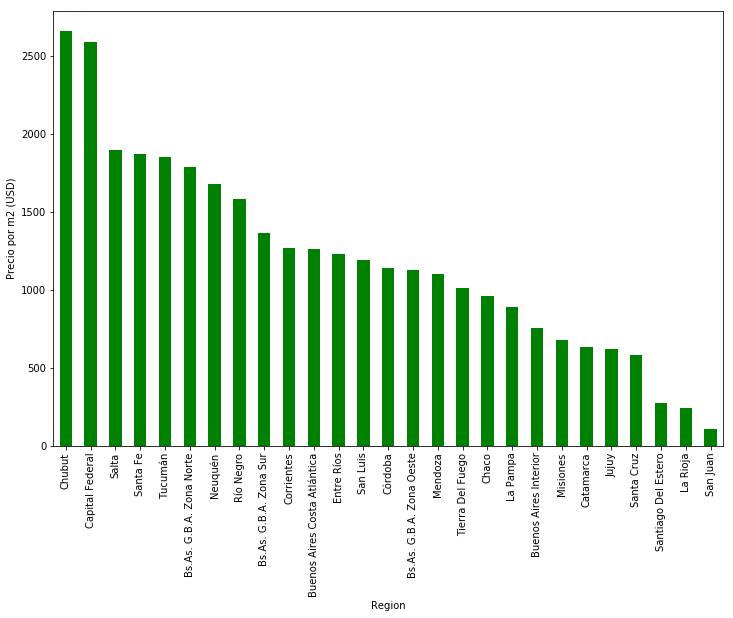

In [14]:
ranking_precios_usd = properati_arreglado.groupby('region').mean()['price_usd_per_m2'].sort_values(ascending=False)
ranking_precios_usd.plot(kind='bar',figsize=(12,8),color='g')
plt.xlabel('Region')
plt.ylabel('Precio por m2 (USD)')
plt.show()

#### Tiene coherencia?

#### Otra demostracion de los datos erroneos en los precios. Deberia ser parecido al grafico en USD

In [15]:
ranking_precios_usd = properati_arreglado.groupby('region').mean()['price_usd_per_m2']
ranking_precios_ars = properati_arreglado.groupby('region').mean()['price_per_m2']

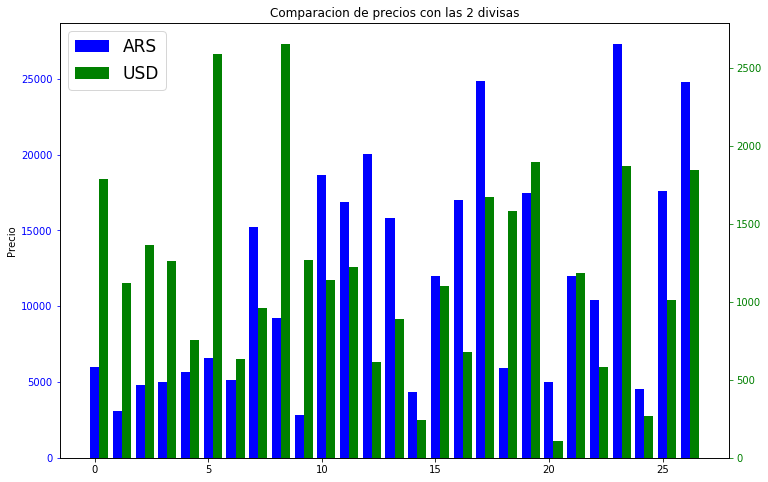

In [16]:
N = properati_arreglado.region.drop_duplicates().count()

ind = np.arange(N)  # the x locations for the groups
width = 0.40       # the width of the bars

fig, ax1 = plt.subplots(figsize=(12,8))
ars= ax1.bar(ind, ranking_precios_ars, width, color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
usd = ax2.bar(ind + width, ranking_precios_usd, width, color='g')
ax2.tick_params('y', colors='g')

# add some text for labels, title and axes ticks
ax1.set_ylabel('Precio')
ax1.set_title('Comparacion de precios con las 2 divisas')
#ax.set_xticks(ind + width / 2)
#ax1.set_xticklabels(properati_arreglado.region.drop_duplicates().values) #funcionaria si no fuera por los acentos

ax1.legend((ars, usd), ('ARS', 'USD'),fontsize = 17)
plt.show()

In [17]:
propiedades_full=properati
propiedades_full.columns

Index([u'Unnamed: 0', u'id', u'created_on', u'operation', u'property_type',
       u'place_name', u'place_with_parent_names', u'country_name',
       u'state_name', u'geonames_id', u'lat-lon', u'lat', u'lon', u'price',
       u'currency', u'price_aprox_local_currency', u'price_aprox_usd',
       u'surface_total_in_m2', u'surface_covered_in_m2', u'price_usd_per_m2',
       u'price_per_m2', u'floor', u'rooms', u'expenses', u'properati_url',
       u'description', u'title', u'image_thumbnail', u'region', u'localidad',
       u'ciudad', u'barrio'],
      dtype='object')

In [18]:
properties_by_type=propiedades_full[['place_name','property_type']]


In [19]:
properties_by_type_and_total=properties_by_type.groupby('place_name').count().reset_index()

In [20]:
properties_by_type_and_total.columns=['place_name','total_properties']
properties_by_type_and_total

,place_name,total_properties
0,Country Maschwitz Club,3
1,los alamos,1
2,9 de Abril,3
3,Abasto,139
4,Abril Club de Campo,19
5,Acacias Blancas,34
6,Acassuso,242
7,Achiras,8
8,Adolfo Alsina,8
9,Adrogué,734


In [21]:
properties_by_type=properties_by_type.groupby('place_name').apply(lambda x: x['property_type'].value_counts()).reset_index()
properties_by_type=pd.pivot_table(properties_by_type,index=['place_name'],columns=['level_1']).reset_index()
properties_by_type

place_name property_type                   \
level_1                                                PH apartment  house   
0                    Country Maschwitz Club           NaN       NaN    3.0   
1                                los alamos           NaN       1.0    NaN   
2                                9 de Abril           NaN       NaN    1.0   
3                                    Abasto          14.0      79.0   37.0   
4                       Abril Club de Campo           NaN       NaN   19.0   
5                           Acacias Blancas           NaN       NaN   34.0   
6                                  Acassuso           8.0      88.0  138.0   
7                                   Achiras           NaN       4.0    3.0   
8                             Adolfo Alsina           NaN       NaN    8.0   
9                                   Adrogué          25.0     172.0  503.0   
10          Aeropuerto Internacional Ezeiza           NaN       NaN    2.0   
11                                Agronomía           7.0      29.0    4.0   
12                              Agua Blanca           NaN       NaN    1.0   
13                              Agua de Oro           NaN       NaN    6.0   
14                             Aguas Verdes           2.0       8.0    5.0   
15                 Albanueva Barrio Cerrado           NaN      15.0   11.0   
16                          Aldea Brasilera           NaN       NaN    1.0   
17                              Aldea Salto           NaN       NaN    1.0   
18                               Aldo Bonzi           NaN       NaN    5.0   
19                           Alejandro Korn           NaN       1.0   14.0   
20                           Alejandro Roca           NaN       NaN    1.0   
21                                     Alem           NaN       2.0    NaN   
22                                    Alfar           NaN       NaN    1.0   
23                               Almafuerte           NaN       NaN    7.0   
24                                  Almagro          68.0    1023.0   38.0   
25                          Almirante Brown           2.0      13.0   26.0   
26                              Alta Gracia           NaN       3.0   15.0   
27                                 Altamira           NaN       NaN   14.0   
28                        Alto Los Cardales           NaN       NaN    3.0   
29                        Altos de Hudson I           NaN       NaN    1.0   
...                                     ...           ...       ...    ...   
1030              Villa Santa Cruz del Lago           NaN       1.0   10.0   
1031                       Villa Santa Rita          13.0      32.0   11.0   
1032                        Villa Sarmiento          20.0      78.0   53.0   
1033                          Villa Soldati           2.0       8.0    3.0   
1034                            Villa Tesei           NaN       2.0   12.0   
1035                          Villa Udaondo           1.0       1.0   23.0   
1036                            Villa Unión           NaN       1.0    NaN   
1037                          Villa Urquiza          92.0    1451.0   65.0   
1038                         Villa Vatteone           1.0       1.0    4.0   
1039                          Villa Ventana           NaN       NaN    1.0   
1040                     Villa de Las Rosas           NaN       NaN    4.0   
1041                          Villa de Mayo           NaN      10.0   25.0   
1042                          Villa de Soto           NaN       NaN    2.0   
1043                        Villa del Dique           NaN       NaN   23.0   
1044                       Villa del Parque          47.0     378.0   50.0   
1045                      Villa del Totoral           NaN       NaN    8.0   
1046     Village Golf & Tennis Country Club           NaN       NaN    7.0   
1047                                Villars           NaN       NaN    1.0   
1048                       Virasoro Village           N

In [22]:
 properties_by_type.columns=['place_name','PH','apartment','house','store']

In [23]:
properties_by_type_and_total=pd.merge(properties_by_type,properties_by_type_and_total,on = 'place_name', how='left')

In [24]:
properties_by_type_and_total_mean=properties_by_type_and_total

In [25]:
properties_by_type_and_total_mean=properties_by_type_and_total_mean.fillna(value=0)

In [26]:
properties_by_type_and_total_mean['apartment_mean']=properties_by_type_and_total_mean['apartment']/properties_by_type_and_total_mean['total_properties']
properties_by_type_and_total_mean['PH_mean']=properties_by_type_and_total_mean['PH']/properties_by_type_and_total_mean['total_properties']
properties_by_type_and_total_mean['house_mean']=properties_by_type_and_total_mean['house']/properties_by_type_and_total_mean['total_properties']
properties_by_type_and_total_mean['store_mean']=properties_by_type_and_total_mean['store']/properties_by_type_and_total_mean['total_properties']

In [27]:
properties_by_type_and_total_mean

,place_name,PH,apartment,house,store,total_properties,apartment_mean,PH_mean,house_mean,store_mean
0,Country Maschwitz Club,0.0,0.0,3.0,0.0,3,0.000000,0.000000,1.000000,0.000000
1,los alamos,0.0,1.0,0.0,0.0,1,1.000000,0.000000,0.000000,0.000000
2,9 de Abril,0.0,0.0,1.0,2.0,3,0.000000,0.000000,0.333333,0.666667
3,Abasto,14.0,79.0,37.0,9.0,139,0.568345,0.100719,0.266187,0.064748
4,Abril Club de Campo,0.0,0.0,19.0,0.0,19,0.000000,0.000000,1.000000,0.000000
5,Acacias Blancas,0.0,0.0,34.0,0.0,34,0.000000,0.000000,1.000000,0.000000
6,Acassuso,8.0,88.0,138.0,8.0,242,0.363636,0.033058,0.570248,0.033058
7,Achiras,0.0,4.0,3.0,1.0,8,0.500000,0.000000,0.375000,0.125000
8,Adolfo Alsina,0.0,0.0,8.0,0.0,8,0.000000,0.000000,1.000000,0.000000
9,Adrogué,25.0,172.0,503.0,34.0,734,0.234332,0.034060,0.685286,0.046322


In [28]:
properties_by_usd_m2=propiedades_full[['place_name','price_usd_per_m2']].dropna().groupby('place_name').mean().reset_index()

In [29]:
properties_by_m2_and_type_mean=pd.merge(properties_by_usd_m2,properties_by_type_and_total_mean,on='place_name',how='left')

In [30]:
properties_by_m2_and_type_mean_greater_than_20 = properties_by_m2_and_type_mean[properties_by_m2_and_type_mean['total_properties']>20]

In [31]:
properties_by_m2_and_type_mean_greater_than_20[properties_by_m2_and_type_mean_greater_than_20['apartment_mean']< 0.5]['total_properties'].count()

216

## propiedades con patio y a estrenar

In [32]:
news_properties_with_garden=pd.DataFrame({'id':propiedades_full['id'],'place_name':propiedades_full['place_name']\
                                          ,'description':propiedades_full['description'],'price_usd_per_m2':propiedades_full['price_usd_per_m2']})


In [33]:
news_properties_with_garden=news_properties_with_garden.dropna(how='any')

In [34]:
news_properties_with_garden['has_garden']=news_properties_with_garden.loc[:,'description'].str.lower().str.contains('patio')
news_properties_with_garden['is_new']=news_properties_with_garden.loc[:,'description'].str.lower().str.contains('estrenar')

In [35]:
news_properties_with_garden.sort_values(by='price_usd_per_m2',ascending=False)[:10]

,description,id,place_name,price_usd_per_m2,has_garden,is_new
26637,Departamento 1 ambiente divisible Depto en CU...,59e40c3d85b8f741ecb5cb44b14d5e125ff2cf1c,Boedo,206333.333333,False,False
26037,lan840- DEPTO FINANCIACION DIRECTA EN PESOSAnt...,95c4cd425c59753f4c22f544cc24f773da8f1d30,Boedo,173826.066667,False,False
26193,fac030- Depto anticipo en 10 meses y saldo en ...,6be02ca3d471f5c7f0727cfc75e1bf1adaad1d2f,Boedo,104486.114286,False,False
114131,"CODIGO: ubicado en: MONSEÑOR TERRERO , Ituzai...",0839029ac05a47e8a05de7e3c52fb0c09d687197,Ituzaingó,80000.000000,True,False
25853,bf221- INCREIBLE FORMA DE PAGO- ANT Y CUOTAS D...,f4e58d0d84472d6bc59f6e4361fe0c936c08fc24,Boedo,78533.333333,False,False
44906,1119-AE035 Rosario: Av. Francia 735 (Entre Crd...,9d123e98bf8057a3fb07c13158134dce9468d29b,Rosario,57382.080000,False,False
27066,EDIFICIO: GALA XVIII Venta en Cuotas y en Peso...,d87a267d8150bf0c2738b05d5d3e34838b5ec866,Villa Ballester,48296.222222,False,False
26992,EDIFICIO: GALA XVIII Venta en Cuotas y en Peso...,579856cae895d7e1a307df4127162d3a60dbff8c,Villa Ballester,48296.222222,False,False
27004,EDIFICIO: GALA XVIII Venta en Cuotas y en Peso...,a0e20cbd5c24c9c662ab3d382dc9f67ca052468a,Villa Ballester,48296.222222,False,False
27065,EDIFICIO: GALA XVIII Venta en Cuotas y en Peso...,52effce91f223884823b62d97f0adc864e9562d9,Villa Ballester,45640.000000,False,False


## Veamos cuales son las ciudades que vendieron más casas con patio

In [36]:
properties_total=propiedades_full[['place_name','property_type']]
#Calculo el total de las ventas por ciudad
properties_total=properties_total.groupby('place_name').count().reset_index()

In [37]:
properties_total.columns=['place_name','total']

In [38]:
#Calculo la cantidad de casas con jardines vendidas por ciudad
properties_garden_count=news_properties_with_garden[['place_name','has_garden']][news_properties_with_garden['has_garden']]\
.groupby('place_name').count().reset_index()

In [39]:
#Merge entre cantidad de casas con jardines con cantidad total de casas
properties_garden_count=pd.merge(properties_garden_count,properties_total,on='place_name',how='left')

In [40]:
properties_garden_count['has_garden_percent']=properties_garden_count['has_garden']/properties_garden_count['total']

In [41]:
#Elimino los datos con menores a 50 ventas.
properties_garden_count=properties_garden_count[properties_garden_count['total']>50]

In [42]:
properties_garden_count.sort_values(by='has_garden_percent',ascending=False)

,place_name,has_garden,total,has_garden_percent
407,Tres Arroyos,36,80,0.450000
449,Villa Madero,21,54,0.388889
415,Valentín Alsina,81,211,0.383886
351,San Bernardo,47,124,0.379032
67,Carapachay,44,121,0.363636
451,Villa Martelli,25,70,0.357143
52,Bs.As. G.B.A. Zona Oeste,21,65,0.323077
246,Mataderos,132,418,0.315789
200,Lanús Oeste,53,172,0.308140
387,Santos Lugares,42,137,0.306569


In [43]:
propiedades_full[(propiedades_full['place_name']=='Boedo') & (propiedades_full['description'].str.lower().str.contains('patio'))]

,Unnamed: 0,id,created_on,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,...,rooms,expenses,properati_url,description,title,image_thumbnail,region,localidad,ciudad,barrio
51,51,9b566be9befe843a5758620ef84864b144de7f68,2017-02-01,sell,house,Boedo,|Argentina|Capital Federal|Boedo|,Argentina,Capital Federal,3436003.0,...,NaN,NaN,http://www.properati.com.ar/15bui_venta_casa_b...,Se encuentra dentro del Distrito Tecnológico. ...,Casa impecable refaccionada! 6 ambientes.,https://thumbs4.properati.com/4/bcATdI9jz_52YM...,Capital Federal,Boedo,NaN,NaN
1858,1858,22a85950d38b44bfbc72b468cebdac6e20dd266b,2017-02-08,sell,house,Boedo,|Argentina|Capital Federal|Boedo|,Argentina,Capital Federal,3436003.0,...,1.0,NaN,http://www.properati.com.ar/15jib_venta_casa_b...,Se trata de un ph en el Barrio de Boedo2 ambie...,U$D 73.000 - Tipo casa PH en Venta - Pavon ...,https://thumbs4.properati.com/3/v9TULEd3ySFkWV...,Capital Federal,Boedo,NaN,NaN
4448,4448,71d50753b6b83cc7e08b055465f16ddea885f0b6,2017-02-09,sell,apartment,Boedo,|Argentina|Capital Federal|Boedo|,Argentina,Capital Federal,3436003.0,...,4.0,NaN,http://www.properati.com.ar/15mxb_venta_depart...,Corredor Responsable: Martin Macagno - CUCICBA...,VENTA dpto 4 amb con quincho y lavadero cubierto,https://thumbs4.properati.com/0/8CdM4E_8V_pJdc...,Capital Federal,Boedo,NaN,NaN
4887,4887,fbda2d4e6f7be50639c0c02dc3e2d2611e0339ae,2017-02-10,sell,PH,Boedo,|Argentina|Capital Federal|Boedo|,Argentina,Capital Federal,3436003.0,...,5.0,NaN,http://www.properati.com.ar/15odn_venta_ph_boe...,Hermoso Ph al frente con entrada independient...,PH AL FRENTE CON ENTRADA INDEPENDIENTE ES MUY ...,https://thumbs4.properati.com/2/LMMCdETxgwtWal...,Capital Federal,Boedo,NaN,NaN
10380,10380,336f7cbc24fe7ecaf44fc1f9f3a3277c51d6e9b2,2017-03-08,sell,apartment,Boedo,|Argentina|Capital Federal|Boedo|,Argentina,Capital Federal,3436003.0,...,2.0,NaN,http://www.properati.com.ar/167fb_venta_depart...,RESERVADO!! Consultar por otras unidades dispo...,Boedo venta dpto 2 amb.c/patio en Marmol al 700,https://thumbs4.properati.com/7/BTD3VzewH0JaEH...,Capital Federal,Boedo,NaN,NaN
10796,10796,f5684670cc3ff9eb86b1c9340b1cbe228268e383,2017-03-10,sell,PH,Boedo,|Argentina|Capital Federal|Boedo|,Argentina,Capital Federal,3436003.0,...,3.0,NaN,http://www.properati.com.ar/16926_venta_ph_boe...,Corredor Responsable: Martin Macagno - CUCICBA...,PH en venta a refaccionar,https://thumbs4.properati.com/3/bUiFBNnA_MYBQn...,Capital Federal,Boedo,NaN,NaN
14234,14234,ed2b66c23c1bf1b8e37b5afdd0f66886a0382dd1,2017-03-23,sell,store,Boedo,|Argentina|Capital Federal|Boedo|,Argentina,Capital Federal,3436003.0,...,NaN,NaN,http://www.properati.com.ar/16rm5_venta_local_...,CODIGO: 2883-759 ubicado en: Sanchez de Loria ...,Local c/vivienda 4 ambientes en PH s/expensas ...,https://thumbs4.properati.com/2/W94IYYXQKH-qz1...,Capital Federal,Boedo,NaN,NaN
14238,14238,f9db352797e2675166ac332561744219fe6e9cfd,2017-03-23,sell,PH,Boedo,|Argentina|Capital Federal|Boedo|,Argentina,Capital Federal,3436003.0,...,NaN,NaN,http://www.properati.com.ar/16rmc_venta_ph_boe...,CODIGO: 2883-857 ubicado en: Sanchez de Loria ...,1amb PH PBja Patio espacio aereo,https://thumbs4.properati.com/7/u99AFFs92UzFFw...,Capital Federal,Boedo,NaN,NaN
15485,15485,0ba9c0625a72f6008d456ad1c6896513a4fe8f6d,2017-03-28,sell,store,Boedo,|Argentina|Capital Federal|Boedo|,Argentina,Capital Federal,3436003.0,...,NaN,NaN,http://www.properati.com.ar/16v5r_venta_local_...,LOCALBOEDO: LOCAL AL FRENTE CON DOS ENTRADAS E...,LOCAL EN VENTA,https://thumbs4.properati.com/1/ihPiPKiKmVSyrR...,Capital Federal,Boedo,NaN,NaN
15822,15822,67cd3ca0ce13591d150e59263b1f90c035bcb1f1,2017-03-28,sell,apartment,Boedo,|Argentina|Capital Federal|Boedo|,Argentina,Capital Federal,3436003.0,...,NaN,2000.0,http://www.properati.com.ar/16wm6_venta_depart...,CODIGO: 03 ubicado en: C Calvo 3500 - Publica...,Carlos Calvo 3500Amplio 2 amb PB con patio y c...,https://thumbs4.properati.com

## Cual es el tipo de propiedad que se vende mas?

In [44]:
top_tipos=properati_arreglado.groupby('property_type')['price'].count().sort_values()

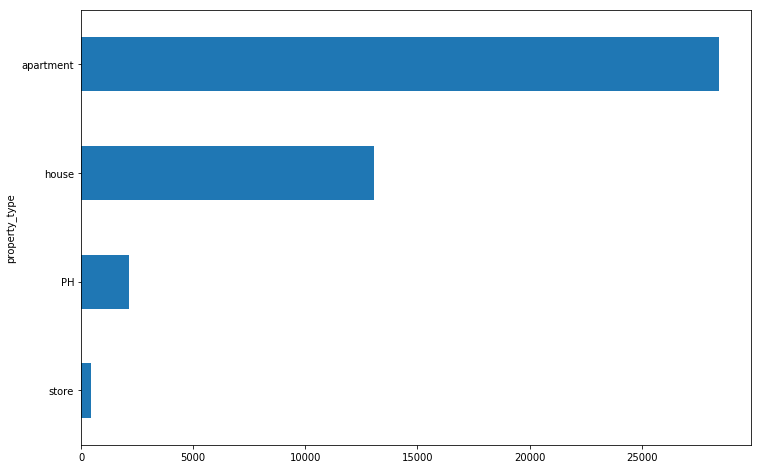

In [45]:
top_tipos.plot(kind='barh',figsize=(12,8))
#plt.set_ylabel('Tipo')
#plt.set_xlabel('Cantidad')
plt.show()

## Promedio de precio por tipo

In [46]:
promedio_por_tipo = properati_arreglado.groupby('property_type')['price_per_m2'].mean()

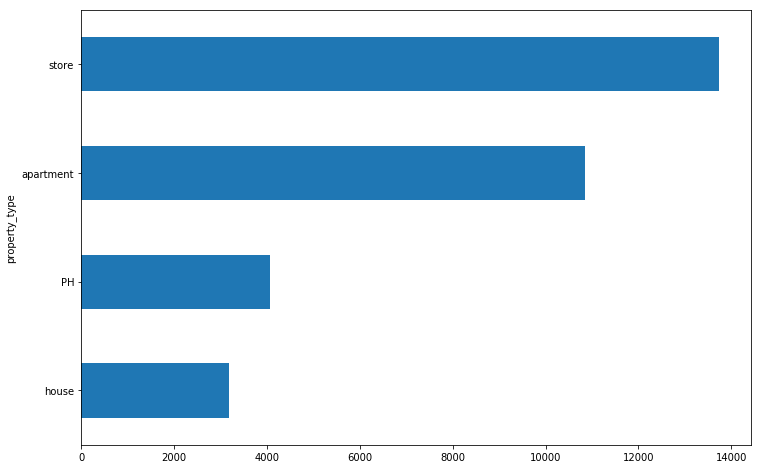

In [47]:
promedio_por_tipo.sort_values().plot(kind='barh',figsize=(12,8))
#plt.set_ylabel('Tipo')
#plt.set_xlabel('Cantidad')
plt.show()

## Promedio precio por m2 por mes <span style="color:red"> Mejorar grafico

In [48]:
#promedio_por_tipo_y_mes = properati_arreglado[properati_arreglado['created_on'].dt.year == 2017]
promedio_por_tipo_y_mes = properati_arreglado.groupby(by=[properati_arreglado['created_on'].dt.month,'property_type'])['price_per_m2'].mean()

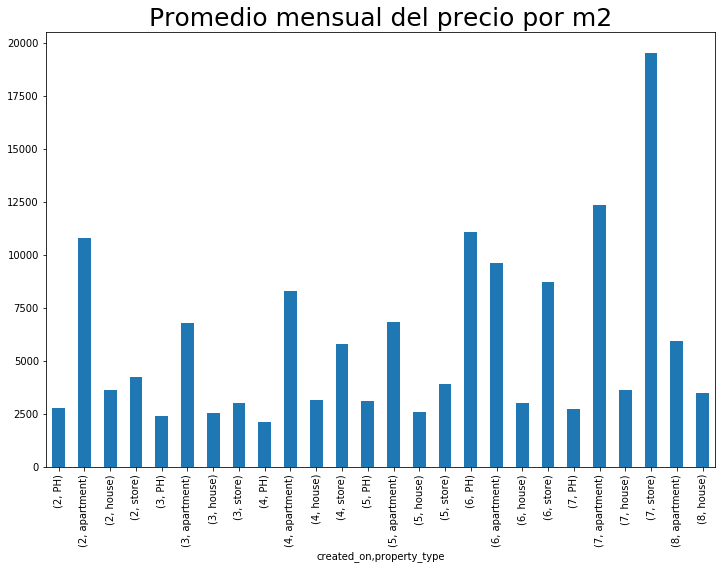

In [49]:
promedio_por_tipo_y_mes.plot(kind='bar',figsize=(12,8))
plt.title('Promedio mensual del precio por m2',size=25)
#plt.set_ylabel('Tipo')
#plt.set_xlabel('Cantidad')
plt.show()

# <span style="color:red"> Borrar columna Unamed0, editar precios (guardar en properati arreglado) y refactorizar

## Insertar columnas adicionales como a estrenar y con jardin en dataframe principal

## Duracion de las publicaciones en meses vs precio

## Duracion de las publicaciones en meses vs tipo

##  Valor de las expensas vs el precio total

##  Supeficie descubierta vs precio 

## Metro cuadrado vs años para cada tipo

##  Piso del departamento vs precio

##  Precio por m2 vs habitaciones

## Zonas con mas venta de edificios

## Habitaciones vs precio

## <span style="color:green"> Relacionar geonames en gmaps para graficar algunos resultados sobre regiones, zonas y demas